# Notebook 4/4: Analysis and visualization 
***

# Table of contents
1. [Purpose of this notebook](#1)
2. [Data preparation](#2)
    1. [Import libraries](#2A)
    2. [Load data](#2B)
        1. [Number of daily checkins per ticket type (metro_nb) and distribution of hourly checkins per day category (metro_hp](#2Ba)
        2. [Geographical data (geo)](#2Bb)
    3. [Wrangling](#2C)
3. [Analysis & visualisation](#3)
    1. [What is the station with the most traffic, and what is the most common ticket type?](#3A)
        1. [Map of # checkins per station and most frequent ticket type](#3Aa)
        2. [How many tickets were checked-in to the Parisian metro network in 2018?](#3Ab)
        3. [What was the metro station with the most traffic in Paris, in 2018?](#3Ac)
            1. [What was the metro station with the least traffic in Paris, in 2018?](#3Aca)
        4. [What was the most frequent ticket type?](#3Ad)
    2. [What are the proportions of each ticket type?](#3B)
        1. [Proportions of each ticket type in 2018 (bar plot)](#3Ba)
        2. [Number of checkins per ticket type, per month (bar plot)](#3Bb)
        3. [Percentage of checkins per ticket type, per month (bar plot)](#3Bc)
    3. [How does traffic fluctuate along the year?](#3C)
        1. [Calendar map of traffic in 2018](#3Ca)
        2. [What was the day with the most traffic, in 2018?](#3Cb)
            1. [What was the day with the least traffic, in 2018?](#3Cba)
    4. [Which stations have the highest proportion of IMAGINE R & NAVIGO checkins?](#3D)
        1. [Heatmap of IMAGINE R traffic (% of total traffic)](#3Da)
        2. [Stations with the highest proportion of IMAGINE R traffic (% of total) (bar plot)](#3Db)
        3. [Stations with the highest proportion of NAVIGO traffic (% of total) (bar plot)](#3Dc)
        4. [Plot of yearly traffic: ESPLANADE DE LA DEFENSE vs. NOTRE-DAME-DES-CHAMPS](#3Dd)
    5. [How does traffic fluctuate along the day?](#3E)
        1. [Hourly traffic at NOTRE-DAME-DES-CHAMPS](#3Ea)
            1. [What are the busiest hours of the *morning/afternoon* of a *working day outside school holidays* at NOTRE-DAME-DES-CHAMPS?](#3EAa)
        2. [Hourly traffic at ESPLANADE DE LA DEFENSE](#3Eb)
            1. [What are the busiest hours of the *morning/afternoon* of a *working day outside school holidays* at ESPLANADE DE LA DEFENSE?](#3Eba)
    6. [How many people checked in the station SAINT-LAZARE between 8H-9H on 2018-01-01?](#3F)
    7. [Visualization of hourly traffic with kepler.gl](#3G)
        1. [Prepare data & export to csv](#3Ga)

# 1. Purpose of this notebook <a name="1"></a>

This final notebook analyzes the traffic data of Parisian metro stations for the year 2018. 

For more information about the data, please refer to notebook 1/4. The data cleaning process was performed in notebooks 2/4 and 3/4.

We will explore some questions about the data, and answer them with visualizations.

Please note that iPyLeaflet maps do not display on Github. I have inserted images for better readability.

# 2. Data preparation <a name="2"></a>

## 2.A. Import libraries <a name="2A"></a>

In [70]:
# Pandas & Numpy
import pandas as pd
import numpy as np

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

# Ipyleaflet
from ipywidgets import *
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker, Icon, Popup, Heatmap

# Calmap
import calmap

## 2.B. Load data <a name="2B"></a>

### 2.B.a. Number of daily checkins per ticket type (metro_nb) and distribution of hourly checkins per day category (metro_hp) <a name="2Ba"></a>

In [71]:
metro_nb = pd.read_csv('../../datasets/metro_nb.csv')
metro_hp = pd.read_csv('../../datasets/metro_hp.csv')

In [72]:
metro_nb.head()

,DAY,STOP_NAME,ID_REFA_LDA,TICKET_TYPE,NB_CHECKINS
0,2018-05-09,OLYMPIADES,71557.0,AMETHYSTE,462.0
1,2018-05-09,OLYMPIADES,71557.0,NAVIGO,10764.0
2,2018-05-09,LES AGNETTES-ASNIERES-GENNEVILLIERS,72240.0,NAVIGO,3972.0
3,2018-05-09,LES COURTILLES,72286.0,TST,813.0
4,2018-05-09,BOURSE,73635.0,NaN,4.0


In [73]:
metro_hp.head()

,STOP_NAME,ID_REFA_LDA,CAT_DAY,HOUR,PCT_CHECKINS_s1,PCT_CHECKINS_s2,PCT_CHECKINS_mean
0,QUAI DE LA GARE,71597.0,DIJFP,11.0,3.83,3.87,3.850
1,QUAI DE LA GARE,71597.0,DIJFP,13.0,5.33,5.38,5.355
2,QUAI DE LA GARE,71597.0,DIJFP,14.0,6.44,6.59,6.515
3,QUAI DE LA GARE,71597.0,DIJFP,15.0,7.90,7.74,7.820
4,QUAI DE LA GARE,71597.0,DIJFP,18.0,11.28,9.68,10.480


In [74]:
metro_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744502 entries, 0 to 744501
Data columns (total 5 columns):
DAY            744502 non-null object
STOP_NAME      744502 non-null object
ID_REFA_LDA    744502 non-null float64
TICKET_TYPE    647521 non-null object
NB_CHECKINS    744502 non-null float64
dtypes: float64(2), object(3)
memory usage: 28.4+ MB


In [75]:
metro_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35603 entries, 0 to 35602
Data columns (total 7 columns):
STOP_NAME            35603 non-null object
ID_REFA_LDA          35603 non-null float64
CAT_DAY              35603 non-null object
HOUR                 35592 non-null float64
PCT_CHECKINS_s1      35237 non-null float64
PCT_CHECKINS_s2      35175 non-null float64
PCT_CHECKINS_mean    35603 non-null float64
dtypes: float64(5), object(2)
memory usage: 1.9+ MB


In [76]:
# Convert the DAY column back to datetime

metro_nb["DAY"] = pd.to_datetime(metro_nb["DAY"])

### 2.B.b. Geographical data (geo) <a name="2Bb"></a>

In [77]:
geo = pd.read_csv('../../datasets/geo_metro.csv')

In [78]:
geo.head()

,LAT_LONG,ID_ZDL,STOP_NAME,LINES,LAT,LONG
0,"48.8463569889, 2.41947990037",47247,SAINT-MANDE-TOURELLE,M1,48.846357,2.419480
1,"48.8662858046, 2.32294341224",45676,CONCORDE,M1 / M8 / M12,48.866286,2.322943
2,"48.8828686476, 2.34413063372",42210,ANVERS,M2,48.882869,2.344131
3,"48.8822269008, 2.32127492677",44662,ROME,M2,48.882227,2.321275
4,"48.8804494561, 2.30945116799",44146,MONCEAU,M2,48.880449,2.309451


In [79]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 6 columns):
LAT_LONG     302 non-null object
ID_ZDL       302 non-null int64
STOP_NAME    302 non-null object
LINES        302 non-null object
LAT          302 non-null float64
LONG         302 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


## 2.C. Wrangling <a name="2C"></a>

In [80]:
# Set STOP_NAME column as index

geo.set_index('STOP_NAME', inplace=True)

In [81]:
# Add LAT and LONG (latitude and longitude) columns to metro_nb & metro_hp

# metro_nb

metro_nb['LAT'] = metro_nb['STOP_NAME'].map(geo.LAT)
metro_nb['LONG'] = metro_nb['STOP_NAME'].map(geo.LONG)

# metro_hp

metro_hp['LAT'] = metro_hp['STOP_NAME'].map(geo.LAT)
metro_hp['LONG'] = metro_hp['STOP_NAME'].map(geo.LONG)

# 3. Analysis and visualization <a name="3"></a>

## 3.A. What is the station with the most traffic, and what is the most common ticket type? <a name="3A"></a>

### 3.A.a Map of # checkins per station and most frequent ticket type <a name="3Aa"></a>

#### Legend:
> - **#Checkins**: Size of marker's stroke
> - **Ticket type (most frequent)**:
>> - Navigo: Blue
>> - IMAGINE R: Red
>> - Other tickets: Yellow

#### Prepare data

In [82]:
# DataFrame of aggregated NB_CHECKINS per STOP_NAME

# Group by STOP_NAME and aggregate NB_CHECKINS
gp_stop = metro_nb.groupby('STOP_NAME').sum()['NB_CHECKINS']

# DataFrame
gp_stop = pd.DataFrame(gp_stop)
gp_stop.reset_index(inplace=True)

# Add coordinates
gp_stop['LAT'] = gp_stop['STOP_NAME'].map(geo.LAT)
gp_stop['LONG'] = gp_stop['STOP_NAME'].map(geo.LONG)


# DataFrame of most frequent TICKET_TYPE per STOP_NAME

# Total NB_CHECKINS grouped by STOP_NAME and TICKET_TYPE
gbo_stop_tt = metro_nb.groupby(['STOP_NAME', 'TICKET_TYPE'])
gp_stop_tt = gbo_stop_tt.sum()['NB_CHECKINS']

# DataFrame of most frequent TICKET_TYPE per STOP_NAME
stop_max_tt = gp_stop_tt.reset_index()
stop_max_tt = stop_max_tt.sort_values('NB_CHECKINS', ascending=False).drop_duplicates(subset='STOP_NAME').sort_index()
stop_max_tt = stop_max_tt.loc[:,['STOP_NAME', 'TICKET_TYPE']]
stop_max_tt.set_index('STOP_NAME', inplace=True)


# Map gp_stop (aggregated NB_CHECKINS per STOP_NAME) 
# & stop_max_tt (most frequent TICKET_TYPE per STOP_NAME)

gp_stop['MAX_TICKET_TYPE'] = gp_stop['STOP_NAME'].map(stop_max_tt['TICKET_TYPE'])

#### Map

In [83]:
# Map
center=(48.855115,2.352448)

m = Map(
    center=center,
    zoom=12
)

# Colors
c_dict = {
        'NAVIGO': '#2F80ED', #Turquoise stroke for NAVIGO
        'IMAGINE R' : '#EA3546' #Red stroke for IMAGINE R
    }

# Markers
for x in gp_stop.iterrows():
    lat = x[1].LAT
    long = x[1].LONG
    
    nb_checkins = x[1].NB_CHECKINS
    
    r = int(nb_checkins/800000)
    
    n = x[1].STOP_NAME
    
        
    max_tt = x[1].MAX_TICKET_TYPE
    
    c = c_dict.get(max_tt, '#FDE74C') #Yellow stroke for other tickets
    
    message = HTML()
    
    message.value = n
    
    circle_marker = CircleMarker(location=(lat, long), draggable=False)
    circle_marker.radius = 3
    circle_marker.stroke = True
    circle_marker.color = c
    circle_marker.opacity = 0.5
    circle_marker.weight = max(r,5)
    circle_marker.fill_color = '#000951'
    circle_marker.fill_opacity = 1
    m.add_layer(circle_marker);
    
    circle_marker.popup = message
    
# TileLayer    
positron_layer = basemap_to_tiles(basemaps.CartoDB.Positron)
m.add_layer(positron_layer)  
    
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[48.855115, 2.352448], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.884594208, 2.3379497770599995], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ABBESSES'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.8281884763, 2.32716464961], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ALESIA'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.8563773572, 2.3945619445599995], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ALEXANDRE DUMAS'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.864766845, 2.3009910035], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ALMA-MARCEAU'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.892082786, 2.28500950275], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ANATOLE FRANCE'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.882868647600006, 2.3441306337200003], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ANVERS'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.875594049899995, 2.28932258961], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ARGENTINE'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.865586477600004, 2.3567367568099997], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ARTS ET METIERS'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.8607869626, 2.32099819197], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='ASSEMBLEE NATIONALE'), radius=3), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.9037599311, 2.39228705963], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity', 'line_cap', 'line_join', 'opacity', 'pointer_events', 'radius', 'stroke', 'weight'], popup=HTML(value='AUBERVILLIERS-PANTIN (QUATRE CHEMINS)'), radius=3, weight=8), CircleMarker(color='#2F80ED', fill_color='#000951', fill_opacity=1.0, location=[48.8423600825, 2.36558170411], opacity=0.5, options=['class_name', 'color', 'dash_array', 'fill', 'fill_color', 'fill_opacity

<img width="1000" height="700" controls src="img/map1.png">

> The Paris metro is very dense. It comprises a total of 302 stations over an area of 105 square kilometres (size of Paris). This map is missing one metro station: CLUNY-LA-SORBONNE. For some reason, this station is missing from the daily traffic and hourly profiles datasets (see notebook 3/4).

> A few stations largely dominate the network: Saint-Lazare, Montparnasse, Gare de l'Est. Although our analysis focuses on the metro network, it is important to note that these stations are also rail stations, and therefore allow transfers to trains that serve stations outside of Paris, and connections to a large number of metro, bus and tram lines.

> The network is entirely 'blue' except for one red dot: The most frequent ticket type across all metro stations is Navigo, except for NOTRE-DAME-DES-CHAMPS, where IMAGINE R is the most common rate plan used.

### 3.A.b. How many tickets were checked-in to the Parisian metro network in 2018? <a name="3Ab"></a>

> Answer: 971,366,669

In [84]:
# Total number of checkins in Paris metro in 2018
total_metro_checkins = int(metro_nb['NB_CHECKINS'].sum())

"{:,}".format(total_metro_checkins)

'971,366,669'

### 3.A.c. What was the metro station with the most traffic in Paris, in 2018? <a name="3Ac"></a>

> Answer: SAINT-LAZARE, with 11,288 passengers per day on average. In 2018, a total of 26,617,781 passengers checked-in to SAINT-LAZARE, representing 2.74% of the total traffic.

In [85]:
# Daily average of checkins per metro station
pvt_stations = metro_nb.pivot_table(values = 'NB_CHECKINS', index = 'STOP_NAME', aggfunc = np.mean)
pvt_stations.reset_index(inplace=True)
pvt_stations['NB_CHECKINS'] = pvt_stations['NB_CHECKINS'].astype(int)
pvt_stations.nlargest(n=5, columns='NB_CHECKINS')

,STOP_NAME,NB_CHECKINS
263,SAINT-LAZARE,11288
176,MONTPARNASSE,7161
103,GARE DE L'EST,5464
244,REPUBLIQUE,5086
140,LES HALLES,4352


In [86]:
# Total number of passengers at station SAINT-LAZARE in 2018
metro_nb.groupby('STOP_NAME')['NB_CHECKINS'].sum()['SAINT-LAZARE'].astype(int)

26617781

In [87]:
# Percentage of total checkins
round((metro_nb.groupby('STOP_NAME')['NB_CHECKINS'].sum()['SAINT-LAZARE']/total_metro_checkins)*100,2)

2.74

#### What was the metro station with the least traffic in Paris, in 2018? <a name="3Aca"></a>

> Answer: EGLISE D'AUTEUIL, with 62 passengers per day on average.

In [88]:
pvt_stations.nsmallest(n=5, columns='NB_CHECKINS')

,STOP_NAME,NB_CHECKINS
86,EGLISE D'AUTEUIL,62
191,PELLEPORT,127
233,PRE SAINT-GERVAIS,140
37,BUTTES-CHAUMONT,182
210,PORTE D'AUTEUIL,187


### 3.A.d. What was the most frequent ticket type? <a name="3Ad"></a>

> Answer: NAVIGO

In [89]:
stop_max_tt.TICKET_TYPE.value_counts()

NAVIGO       300
IMAGINE R      1
Name: TICKET_TYPE, dtype: int64

> As seen on the map, Navigo is the most common ticket type accross the Parisian metro network, apart from 1 station (NOTRE-DAME-DES-CHAMPS) where the most frequent ticket type is IMAGINE R. 

> IMAGINE R is a special rate plan for students only, whereas NAVIGO tickets are mostly used by people who **are not** eligible to special discounts (such as AMETHYSTE, TST, FGT). Therefore, people who use IMAGINE R are very likely to be students, and those who use NAVIGO to be working people. 

> Looking at the proportions of each ticket type can give us information on the population.

## 3.B. What are the proportions of each ticket type? <a name="3B"></a>

### 3.B.a. Proportions of each ticket type in 2018 (bar plot) <a name="3Ba"></a>

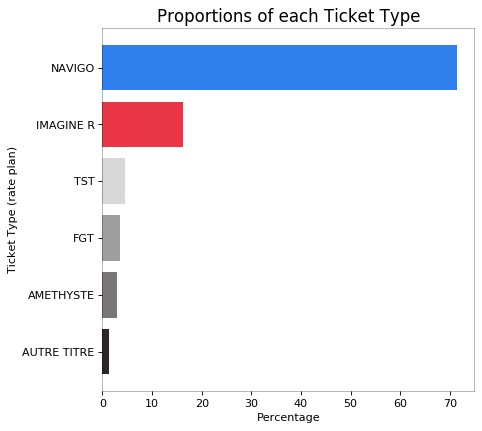

In [90]:
# Data
gbo_tt = metro_nb.groupby('TICKET_TYPE')
gp_tt = gbo_tt.sum()['NB_CHECKINS'].sort_values(ascending=False)
gp_tt_prop = round((gp_tt/total_metro_checkins)*100,2)

# Figure
plt.figure(figsize=(6,6), dpi= 80)

# Data
tickets = gp_tt_prop.index.tolist()
n_tickets = len(tickets)
y_pos = np.arange(n_tickets)
percentage = gp_tt_prop.values.tolist()

# Colors
colors=['#2F80ED', '#EA3546', '#D9D7D8','#A09D9E', '#7A7677', '#2E282A']

plt.barh(y_pos, percentage, align='center', color=colors)


# Style

# Title
plt.title('Proportions of each Ticket Type', fontsize=15)
# Labels
plt.xlabel("Percentage")
plt.ylabel("Ticket Type (rate plan)")
plt.yticks(ticks=range(n_tickets), labels=tickets)
# Spines 
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
# Invert y axis
plt.gca().invert_yaxis()


plt.show()

In [91]:
gp_tt_prop

TICKET_TYPE
NAVIGO         71.40
IMAGINE R      16.18
TST             4.63
FGT             3.59
AMETHYSTE       2.87
AUTRE TITRE     1.27
Name: NB_CHECKINS, dtype: float64

> NAVIGO tickets represent more than 71% of all checkins, followed by IMAGINE R with only 16% of all checkins. Other ticket types represent less than 5% of all checkins.

> We will focus the remaining of our analysis on IMAGINE R and NAVIGO ticket types.

### 3.B.b. Number of checkins per ticket type, per month (bar plot)  <a name="3Bb"></a>

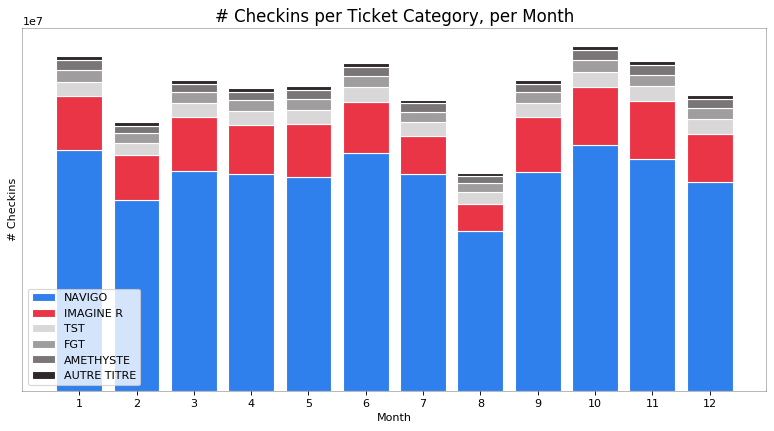

In [92]:
# Data
gbo_month_tt = metro_nb.groupby([metro_nb['DAY'].dt.month, 'TICKET_TYPE'])
gp_month_tt = gbo_month_tt.sum()['NB_CHECKINS']

df_month_tt = pd.DataFrame(gp_month_tt).reset_index()

to_rename = {'DAY': 'MONTH'}
df_month_tt.rename(columns=to_rename, inplace=True)

df_month = pd.DataFrame(df_month_tt.groupby('MONTH').sum()['NB_CHECKINS'])
df_month_tt['TOTAL'] = df_month_tt['MONTH'].map(df_month['NB_CHECKINS'])

df_month_tt.sort_values('MONTH', inplace=True)

df = df_month_tt

tickets = gp_tt_prop.index.tolist()
months = df['MONTH'].unique()

list_checkins = []

for t in tickets:
    l = df[df['TICKET_TYPE'] == t]['NB_CHECKINS'].tolist()
    list_checkins.append(l)

Y = np.array(list_checkins)

X = np.arange(Y.shape[1])

# Colors
colors = ['#2F80ED', '#EA3546', '#D9D7D8','#A09D9E', '#7A7677', '#2E282A']

# Figure
plt.figure(figsize=(12,6), dpi= 80)

# Plot
for y in range(Y.shape[0]):
    plt.bar(X, 
            Y[y], 
            bottom = np.sum(Y[:y], axis = 0), 
            color = colors[y % len(colors)], 
            ec='white')

# Style    
plt.title("# Checkins per Ticket Category, per Month", fontsize=15)
# Labels & ticks
plt.xlabel("Month")
plt.ylabel("# Checkins")
plt.xticks(ticks=range(12), labels=months)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
# Legend
plt.legend({group:col for group, col in zip(tickets, colors[:len(tickets)])})
# Spines
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

> Accross the year, NAVIGO tickets remain the most frequently used tickets. The traffic with both NAVIGO and IMAGINE R tickets decreases dramatically in August and February. The proportions seem to remain stable but the traffic changes make them hard to compare on this plot.

### 3.B.c. Percentage of checkins per ticket type, per month (bar plot)  <a name="3Bc"></a>

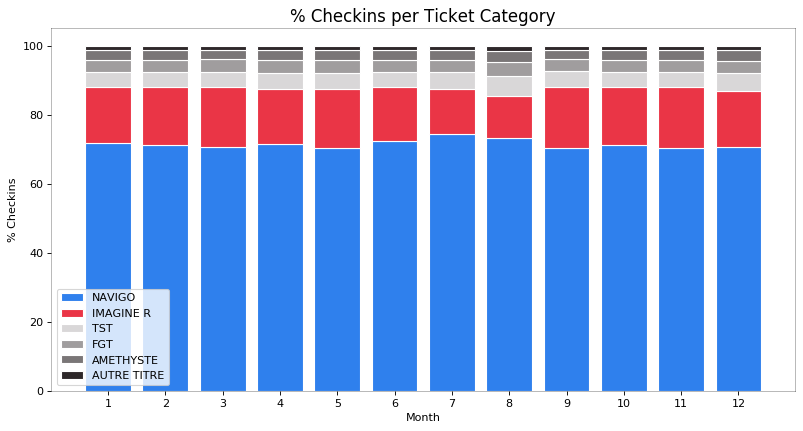

In [93]:
# Data
df_month_tt['PERC_CHECKINS'] = (df_month_tt['NB_CHECKINS']/df_month_tt['TOTAL'])*100

tickets = gp_tt_prop.index.tolist()

Y=[]

for t in tickets:
    l = df_month_tt.loc[df_month_tt['TICKET_TYPE'] == t, 'PERC_CHECKINS'].tolist()
    Y.append(l)

Y = np.array(Y)    
X = np.arange(Y.shape[1])

months = df_month_tt['MONTH'].unique()
n_months = df_month_tt['MONTH'].nunique()

# Figure
plt.figure(figsize=(12,6), dpi= 80)

# Colors
colors = ['#2F80ED', '#EA3546', '#D9D7D8','#A09D9E', '#7A7677', '#2E282A']

# Plot
for y in range(Y.shape[0]):
    plt.bar(X, 
            Y[y], 
            bottom = np.sum(Y[:y], axis = 0), 
            color = colors[y % len(colors)], 
            ec='white')

# Style

# Title
plt.title('% Checkins per Ticket Category', fontsize=15)
# Legend
plt.legend({group:col for group, col in zip(tickets, colors)})
# Labels
plt.xlabel("Month")
plt.ylabel("% Checkins")
plt.xticks(ticks=range(n_months), labels=months)
# Spines 
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

> We can now compare the variations of the proportions of each ticket more easily. Although traffic diminishes *for all ticket types* during summer, the proportions of each ticket type remain roughly the same.

## 3.C. How does traffic fluctuate along the year? <a name="3C"></a>

### 3.C.a. Calendar map of traffic in 2018 <a name="3Ca"></a>

<Figure size 1280x800 with 0 Axes>

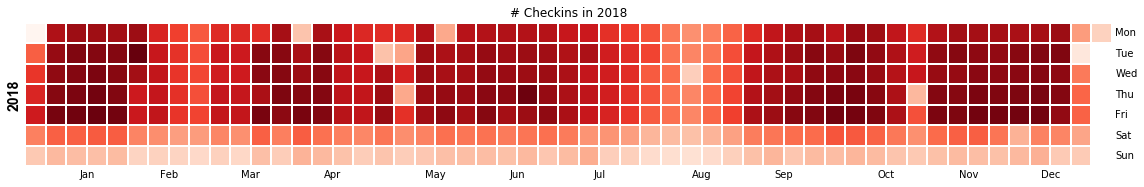

In [94]:
# Data
pvt_days = metro_nb.pivot_table(values = 'NB_CHECKINS', index = 'DAY', aggfunc = np.sum)
df = pvt_days

# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['NB_CHECKINS'], 
                    fig_kws={'figsize': (16,10)}, 
                    yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'# Checkins in 2018'})
plt.show()

> Traffic drops during week-ends and national holidays (May). The decline in traffic is less significant during school holidays, apart from summer holidays (August).

### 3.C.b. What was the day with the most traffic, in 2018? <a name="3Cb"></a>

> Answer: February 06, 2018

In [95]:
busiest_day = pvt_days.nlargest(n=1, columns='NB_CHECKINS').index[0]
busiest_day.strftime("%B %d, %Y")

'February 06, 2018'

#### What was the day with the least traffic, in 2018? <a name="3Cba"></a>

> Answer: January 01, 2018

In [96]:
quiet_day = pvt_days.nsmallest(n=1, columns='NB_CHECKINS').index[0]
quiet_day.strftime("%B %d, %Y")

'January 01, 2018'

## 3.D. Which stations have the highest proportion of IMAGINE R & NAVIGO checkins? <a name="3D"></a>

### 3.D.a. Heatmap of IMAGINE R traffic (% of total traffic) <a name="3Da"></a>

In [97]:
# Data
d1 = metro_nb.groupby('STOP_NAME')['NB_CHECKINS'].sum()
d1 = pd.DataFrame(d1).reset_index()
cols = {'NB_CHECKINS':'TOTAL'}
d1.rename(columns=cols, inplace=True)

d2 = metro_nb.pivot_table(values='NB_CHECKINS', index='STOP_NAME', columns=['TICKET_TYPE'], aggfunc=np.sum).reset_index()

d3 = d1.merge(d2, how='inner', on='STOP_NAME')
d3['PCT_IMAGINER'] = round(d3['IMAGINE R']/d3['TOTAL'],2)
d3['LAT'] = d3['STOP_NAME'].map(geo.LAT)
d3['LONG'] = d3['STOP_NAME'].map(geo.LONG)

# Heatmap of PCT_IMAGINER

center=(48.855115,2.352448)

m = Map(
    center=center,
    zoom=12
)

# Heatmap layer
locations = []

for x in d3.iterrows():
    lat = x[1].LAT
    long = x[1].LONG
    p = x[1].PCT_IMAGINER
    
    loc = [lat, long, p]
    
    locations.append(loc)

heatmap = Heatmap(
    locations=locations,
    radius = 20,
    blur = 15,
    max = 0.007
)

m.add_layer(heatmap);

# Stops layer
for x in geo.iterrows():
    lat = x[1].LAT
    long = x[1].LONG
    
    n = x[0]
    
    message = HTML()
    
    message.value = n
    
    circle_marker = CircleMarker(location=(lat, long), draggable=False)
    circle_marker.radius = 3
    circle_marker.stroke = False
    #circle_marker.color = '#000951'
    #circle_marker.opacity = 0.7
    circle_marker.fill_color = '#ffffff'
    circle_marker.fill_opacity = 0.7
    m.add_layer(circle_marker);
    
    circle_marker.popup = message

# Add a layer with the basemaps dictionary to change style of the map    
dark_matter_layer = basemap_to_tiles(basemaps.CartoDB.DarkMatter)
m.add_layer(dark_matter_layer)    
    
m



Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[48.855115, 2.352448], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), Heatmap(gradient={0.4: 'blue', 0.6: 'cyan', 0.7: 'lime', 0.8: 'yellow', 1.0: 'red'}, locations=[[48.884594208, 2.3379497770599995, 0.17], [48.8281884763, 2.32716464961, 0.19], [48.8563773572, 2.3945619445599995, 0.18], [48.864766845, 2.3009910035, 0.13], [48.892082786, 2.28500950275, 0.14], [48.882868647600006, 2.3441306337200003, 0.17], [48.875594049899995, 2.28932258961, 0.15], [48.865586477600004, 2.3567367568099997, 0.18], [48.8607869626, 2.32099819197, 0.11], [48.9037599311, 2.39228705963, 0.09], [48.8423600825, 2.36558170411, 0.18], [48.84701958189999, 2.29542047803, 0.23], [48.851510278199996, 2.39830234427, 0.12], [48.8360967841, 2.27823795192, 0.11], [48.883734465699995, 2.34963614827, 0.1], [48.9373047355, 2.36007214164, 0.12], [48.853436962299995, 2.36873657263, 0.19], [48.841338247299994, 2.4009185368, 0.16], [48.8719936918, 2.3770297766999997, 0.13], [48.8454707076, 2.42920516635, 0.14], [48.8403020934, 2.3791217764400003, 0.16], [48.8302584573, 2.3763107213900003, 0.22], [48.832110560100006, 2.23863934858, 0.15], [48.8539426062, 2.28933453278, 0.22], [48.8839585726, 2.3319265895299996, 0.13], [48.9063747703, 2.44918990449, 0.11], [48.895454673100005, 2.42532689153, 0.11], [48.866983109399996, 2.29005883358, 0.18], [48.8808212614, 2.37414715384, 0.23], [48.8701642009, 2.35049797186, 0.14], [48.8794817719, 2.38911580738, 0.15], [48.8410940563, 2.2879457665, 0.18], [48.842005347299995, 2.23888732852, 0.18], [48.84074501520001, 2.2285369815, 0.19], [48.868695977799995, 2.34072072367, 0.11], [48.856140713, 2.3702093411000003, 0.15], [48.8905871866, 2.32017475579, 0.13], [48.878514114, 2.38161451329, 0.22], [48.851812133, 2.40102227052, 0.12], [48.875890681899996, 2.3441260304599996, 0.15], [48.847507082, 2.30296829645, 0.19], [48.8354953572, 2.3588234904400003, 0.27], [48.846656851300004, 2.35162325638, 0.28], [48.9195730722, 2.34330592781, 0.15], [48.8404866526, 2.35173948717, 0.36], [48.8677997345, 2.31388193768, 0.13], [48.8452047027, 2.26644154037, 0.29], [48.821595767299996, 2.4137375161500003, 0.18], [48.8742384766, 2.2944905914700002, 0.14], [48.8465346367, 2.2859992220599996, 0.21], [48.854580499099995, 2.38556348082, 0.14], [48.872424912700005, 2.3560449076900003, 0.12], [48.8444563946, 2.44043997806, 0.15], [48.887374907899996, 2.34969408224, 0.09], [48.8785656258, 2.36216007056, 0.12], [48.8580618623, 2.34762515572, 0.19], [48.8107464877, 2.3016785568299998, 0.12], [48.8729681408, 2.33325709179, 0.13], [48.8574200375, 2.3681082907, 0.17], [48.834947722299994, 2.36812632906, 0.14], [48.8549363802, 2.3473213184099997, 0.1], [48.877610187399995, 2.37081139531, 0.15], [48.8447947646, 2.29395196364, 0.17], [48.866285804600004, 2.32294341224, 0.13], [48.8373074919, 2.29663033782, 0.23], [48.8948364675, 2.38252234343, 0.15], [48.8270854489, 2.27941168205, 0.19], [48.8297905137, 2.35041487065, 0.24], [48.8333385593, 2.38663240207, 0.15], [48.8792141342, 2.30352872537, 0.16], [48.8690911629, 2.3805425859900002, 0.11], [48.796740766599996, 2.44943317569, 0.28], [48.7687151253, 2.4645649932099998, 0.23], [48.779905317, 2.45936839626, 0.22], [48.7899783103, 2.45045317792, 0.32], [48.8907889695, 2.3773157556, 0.15], [48.8579655921, 2.43555571977, 0.11], [48.8819319996, 2.3934454523900004, 0.23], [48.839567198299996, 2.39595292659, 0.16], [48.8342929805, 2.33285230996, 0.2], [48.8390411437, 2.38962001542, 0.15], [48.850434550799996, 2.29361243444, 0.21], [48.846854854899995, 2.3166346711099997, 0.19], [48.8546821569, 2.3060974037, 0.16], [48.814803006999995, 2.42237614285, 0.19], [48.840663229300006, 2.3263846107900004, 0.18], [48.8471500557, 2.26913587273, 0.24], [48.893257

<img width="1000" height="700" controls src="img/map2.png">

> This map produces a quite different result from the [map of # checkins per station](#3Aa). Indeed, the Rive Gauche (southern bank of La Seine) has more traffic, due to the prominence of universities in that area, and hence the higher proportion of checkins performed with IMAGINE R tickets.

### 3.D.b. Stations with the highest proportion of IMAGINE R traffic (% of total) (bar plot) <a name="3Db"></a>

> Answer: NOTRE-DAME-DES-CHAMPS, JUSSIEU, CENSIER-DAUBENTON, CRETEIL-UNIVERSITE, RASPAIL.

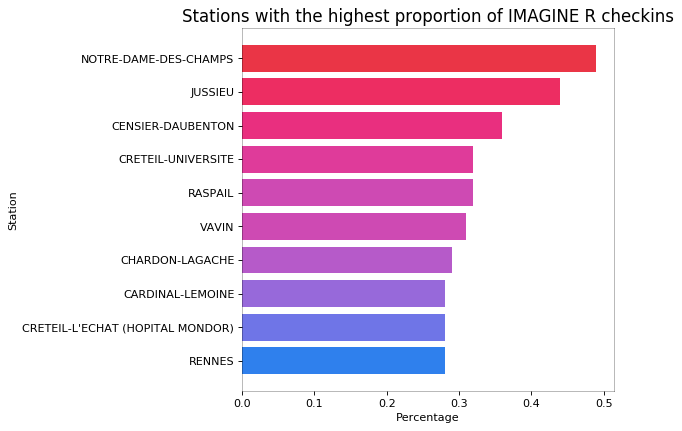

In [34]:
# Data
df = d3.nlargest(10, 'PCT_IMAGINER')[['STOP_NAME', 'PCT_IMAGINER']]

# Figure
plt.figure(figsize=(6,6), dpi= 80)

# Data
stops = df.STOP_NAME.tolist()
n_stops = len(stops)
y_pos = np.arange(n_stops)
percentage = df['PCT_IMAGINER'].tolist()

# Colors
colors=['#ea3546', '#ed2d62', '#e92f7f', '#df3b9a', '#ce4ab3', '#ce4ab3', '#b65ac9', '#9769da', '#6f75e7', '#2f80ed']

plt.barh(y_pos, percentage, align='center', color=colors)


# Style

# Title
plt.title('Stations with the highest proportion of IMAGINE R checkins', fontsize=15)
# Labels
plt.xlabel("Percentage")
plt.ylabel("Station")
plt.yticks(ticks=range(n_stops), labels=stops)
# Spines 
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
# Invert y axis
plt.gca().invert_yaxis()


plt.show()

> Unsurprisingly, the stations with the highest proportion of IMAGINE R checkins are those close to universities.

### 3.D.c. Stations with the highest proportion of NAVIGO traffic (% of total) (bar plot) <a name="3Dc"></a>

> Answer: ESPLANADE DE LA DEFENSE, QUATRE SEPTEMBRE, SAINT-PHILIPPE-DU-ROULE, KLEBER, SAINT-AUGUSTIN.

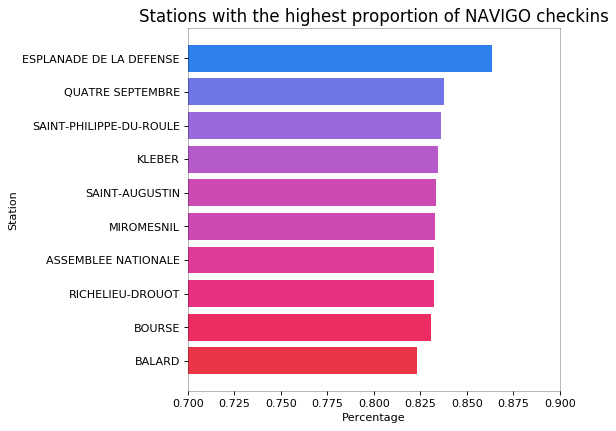

In [35]:
# Data
d3['PCT_NAVIGO'] = d3['NAVIGO']/d3['TOTAL']
df = d3.nlargest(10, 'PCT_NAVIGO')[['STOP_NAME', 'PCT_NAVIGO']]

# Figure
plt.figure(figsize=(6,6), dpi= 80)

# Data
stops = df.STOP_NAME.tolist()
n_stops = len(stops)
y_pos = np.arange(n_stops)
percentage = df['PCT_NAVIGO'].tolist()

# Colors
colors=['#ea3546', '#ed2d62', '#e92f7f', '#df3b9a', '#ce4ab3', '#ce4ab3', '#b65ac9', '#9769da', '#6f75e7', '#2f80ed']
colors.reverse()

plt.barh(y_pos, percentage, align='center', color=colors)


# Style

# Title
plt.title('Stations with the highest proportion of NAVIGO checkins', fontsize=15)
# Labels
plt.xlabel("Percentage")
plt.ylabel("Station")
plt.yticks(ticks=range(n_stops), labels=stops)
# Spines 
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)
# Invert y axis
plt.gca().invert_yaxis()
plt.xlim(0.7, 0.9) 


plt.show()

> Here, we see that the stations where the % of NAVIGO checkins is the highest are those where there is a high concentration of office buildings. 

> More than 85% of the traffic at ESPLANADE DE LA DEFENSE comes from NAVIGO checkins. We will look into the traffic at ESPLANADE DE LA DEFENSE further, and compare it to that of NOTRE-DAME-DES-CHAMPS.

### 3.D.d. Plot of yearly traffic: ESPLANADE DE LA DEFENSE vs. NOTRE-DAME-DES-CHAMPS <a name="3Dd"></a>

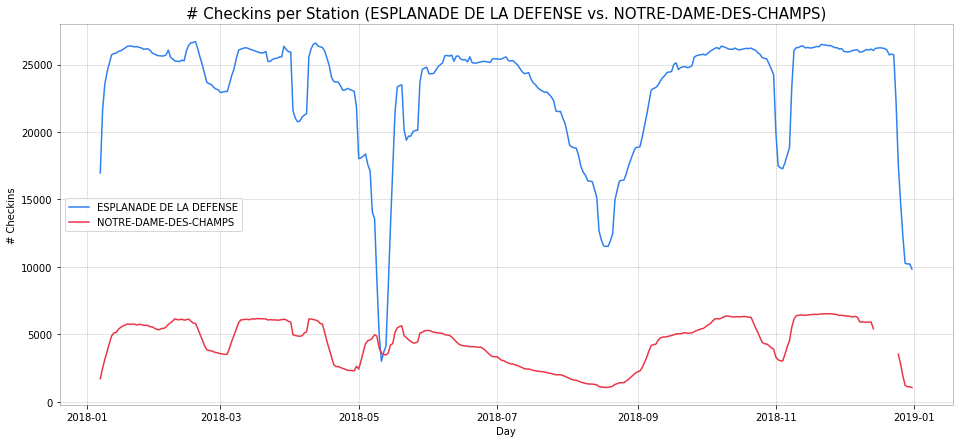

In [36]:
# Data
stations = ['ESPLANADE DE LA DEFENSE', 'NOTRE-DAME-DES-CHAMPS']

df = metro_nb.loc[metro_nb['STOP_NAME'].isin(stations), ['DAY','STOP_NAME', 'NB_CHECKINS']]
df = df.pivot_table(values='NB_CHECKINS', index=['DAY'], columns = ['STOP_NAME'], aggfunc=np.sum)
df.reset_index(inplace=True)

# Colors
colors = ['#2F80ED', '#EA3546']

# Figure
fig, ax = plt.subplots(1,1,figsize=(16, 7))   

# Plot
plt.plot(df.DAY, df['ESPLANADE DE LA DEFENSE'].rolling(7).mean(), color=colors[0], linewidth=1.5)
plt.plot(df.DAY, df['NOTRE-DAME-DES-CHAMPS'].rolling(7).mean(), color=colors[1], linewidth=1.5)

# Style

# Title
plt.title('# Checkins per Station (ESPLANADE DE LA DEFENSE vs. NOTRE-DAME-DES-CHAMPS)', fontsize=15)
# Grid
plt.grid(color='black', alpha=0.3, linestyle="--", lw=0.5)
# Spines 
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)  
# Labels
plt.xlabel("Day")
plt.ylabel("# Checkins")
plt.legend({group:col for group, col in zip(stations, colors)})
 
plt.show()

> We see how dramatically the public holidays of May affected the traffic at Esplanade de la Défense. This station is almost exclusively frequented by people who comute to work (>85%), and therefore more affected by national holidays than other stations. Comparatively, NOTRE-DAME-DES-CHAMPS's traffis is more diverse, as IMAGINE R checkins represent less than half of all checkins.

## 3.E. How does traffic fluctuate along the day? <a name="3E"></a>

### 3.E.a. Hourly traffic at NOTRE-DAME-DES-CHAMPS <a name="3Ea"></a>

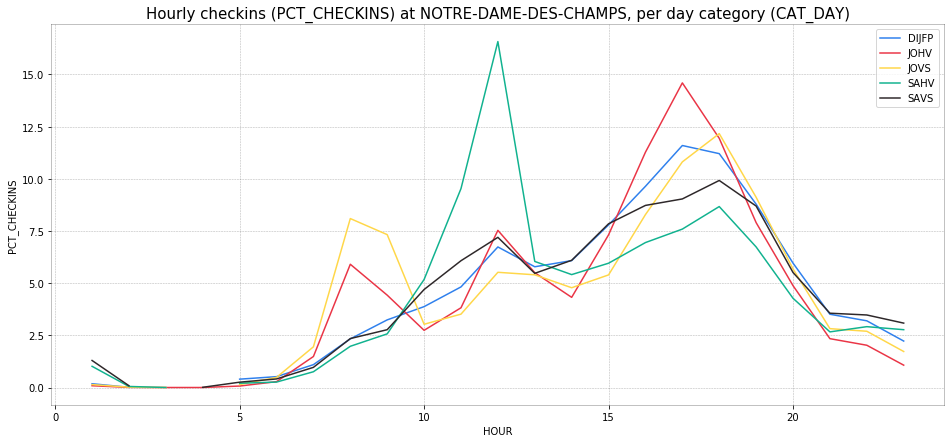

In [37]:
d1 = metro_hp.loc[metro_hp['STOP_NAME'] == 'NOTRE-DAME-DES-CHAMPS']
d1 = d1.pivot(index='HOUR', columns='CAT_DAY', values='PCT_CHECKINS_mean')[1:]
d1.reset_index(inplace=True)

cat_days = metro_hp.CAT_DAY.unique().tolist()

# Colors
colors = ['#2F80ED', '#EA3546', '#FFD749','#11B28F','#2E282A']

# Figure
fig, ax = plt.subplots(1,1,figsize=(16, 7))   

# Plot
for c in cat_days:
    i = cat_days.index(c)
    d2 = d1[['HOUR', c]]
    plt.plot(d2.HOUR, d2[c], color=colors[i], linewidth=1.5)

# Style

# Title
plt.title('Hourly checkins (PCT_CHECKINS) at NOTRE-DAME-DES-CHAMPS, per day category (CAT_DAY)', fontsize=15)
# Grid
plt.grid(color='black', alpha=0.3, linestyle="--", lw=0.5)
# Spines 
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)  
# Labels
plt.xlabel("HOUR")
plt.ylabel("PCT_CHECKINS")
plt.legend({group:col for group, col in zip(cat_days, colors)})


plt.show()

> ##### *Important*: 
> As we look at hourly traffic, it is important to note that this dataset only reports the 1st checkin performed with a ticket in the metro network. It doesn't take into account transfers. Therefore, a curve with a peak in the morning but no such peak in the evening means that people first entered the metro network in this station, but only transfered through it in the evening (we'll see later that such is the case for SAINT-LAZARE). A station can be very busy at a certain hour without having a peak in check-ins because people who are in the station are either exiting the metro network or transfering.

> ##### *Reminder on day categories*:
> - JOHV (Jour Ouvré Hors Vacances): Working day outside school holidays
> - JOVS (Jour Ouvré Vacances Scolaires): Working day during school holidays
> - SAHV (Samedi Hors Vacances): Saturday outside school holidays
> - SAVS (Samedi Vacances Scolaires): Saturday during school holidays
> - DIJFP (Dimanche Jour Férié Pont): Sunday & national holidays

> ##### Observations:
> This plot shows a peak in check-ins around midday on Saturdays outside school holidays. This could be because students have class in the morning, which makes up for most of the traffic for the day.

> On a normal working day however, the peak is arround 5pm, which also coincides with a student schedule.

> On working days during school holidays, it is intersting to note that the peak moves a little bit later in the day, around 6pm. Perhaps because now, traffic is lead by workers, who finish their day a little bit later than students.

> Generally, the fact that check-ins tend to be higher at the end of the day shows that people arrive at this station in the morning and depart from it at the end of the day.

#### What are the busiest hours of the *morning/afternoon* of a *working day outside school holidays* at NOTRE-DAME-DES-CHAMPS? <a name="3Eaa"></a>

> Answer: Morning: '8H', Afternoon: '17H'

In [38]:
d1 = metro_hp.loc[(metro_hp['STOP_NAME'] == 'NOTRE-DAME-DES-CHAMPS') & (metro_hp['CAT_DAY'] == 'JOHV'), ['HOUR', 'PCT_CHECKINS_mean']]
d1 = d1.sort_values('PCT_CHECKINS_mean', ascending = False)

d2 = d1.loc[d1['HOUR'].isin(range(12)), 'HOUR'].head(1).values[0]
d2

8.0

In [39]:
d3 = d1.loc[d1['HOUR'].isin(range(12,24)), 'HOUR'].head(1).values[0]
d3

17.0

### 3.E.b. Hourly traffic at ESPLANADE DE LA DEFENSE <a name="3Eb"></a>

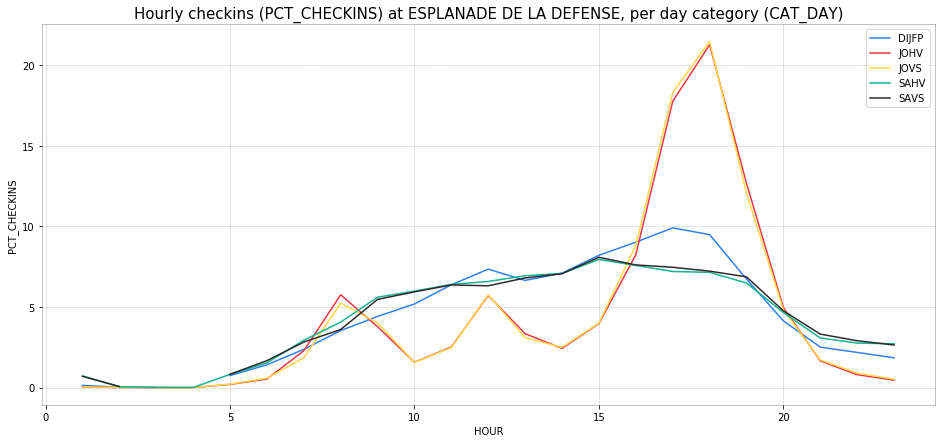

In [40]:
d1 = metro_hp.loc[metro_hp['STOP_NAME'] == 'ESPLANADE DE LA DEFENSE']
d1 = d1.pivot(index='HOUR', columns='CAT_DAY', values='PCT_CHECKINS_mean')[1:]
d1.reset_index(inplace=True)

cat_days = metro_hp.CAT_DAY.unique().tolist()

# Colors
colors = ['#2F80ED', '#EA3546', '#FFD749','#11B28F','#2E282A']

# Figure
fig, ax = plt.subplots(1,1,figsize=(16, 7))   

# Plot
for c in cat_days:
    i = cat_days.index(c)
    d2 = d1[['HOUR', c]]
    plt.plot(d2.HOUR, d2[c], color=colors[i], linewidth=1.5)

# Style

# Title
plt.title('Hourly checkins (PCT_CHECKINS) at ESPLANADE DE LA DEFENSE, per day category (CAT_DAY)', fontsize=15)
# Grid
plt.grid(color='black', alpha=0.3, linestyle="--", lw=0.5)
# Spines 
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)  
# Labels
plt.xlabel("HOUR")
plt.ylabel("PCT_CHECKINS")
plt.legend({group:col for group, col in zip(cat_days, colors)})


plt.show()

> This plot is very different from that of [NOTRE-DAME-DES-CHAMPS](#3Eb). Although the peak in check-ins also tends to be in the afternoon/evening, as people tend to arrive at ESPLANADE DE LA DEFENSE in the morning and depart from it at the end of their day.

> Here, the profile of the hourly check-ins is almost the same on a working day during or outside school holidays. This is probably because, due to the high concentration of offices in the area, most people who check-in to this station work there, and there day remains pretty much the same whether or not it is a school holiday. 

#### What are the busiest hours of the *morning/afternoon* of a *working day outside school holidays* at ESPLANADE DE LA DEFENSE? <a name="3Eba"></a>

> Answer: Morning: '8H', Afternoon: '18H'

In [41]:
d1 = metro_hp.loc[(metro_hp['STOP_NAME'] == 'ESPLANADE DE LA DEFENSE') & (metro_hp['CAT_DAY'] == 'JOHV'), ['HOUR', 'PCT_CHECKINS_mean']]
d1 = d1.sort_values('PCT_CHECKINS_mean', ascending = False)

d2 = d1.loc[d1['HOUR'].isin(range(12)), 'HOUR'].head(1).values[0]
d2

8.0

In [42]:
d3 = d1.loc[d1['HOUR'].isin(range(12,24)), 'HOUR'].head(1).values[0]
d3

18.0

### 3.E.c. Hourly traffic at SAINT-LAZARE <a name="3Ec"></a>

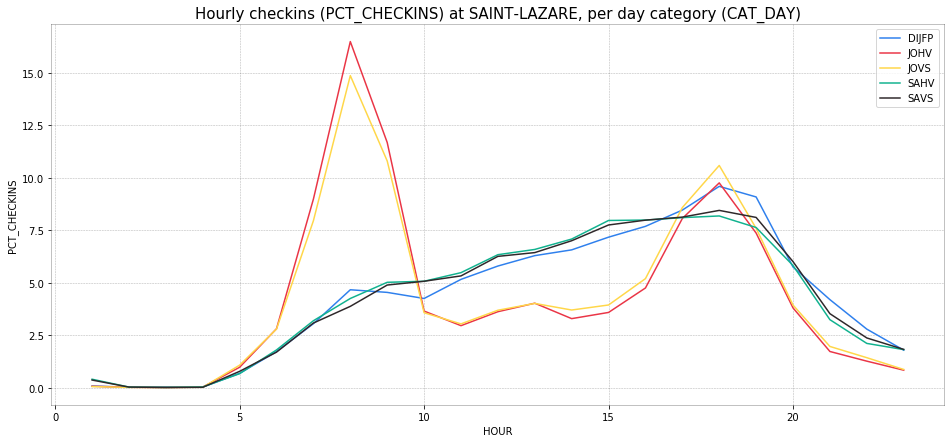

In [43]:
d1 = metro_hp.loc[metro_hp['STOP_NAME'] == 'SAINT-LAZARE']
d1 = d1.pivot(index='HOUR', columns='CAT_DAY', values='PCT_CHECKINS_mean')[1:]
d1.reset_index(inplace=True)

cat_days = metro_hp.CAT_DAY.unique().tolist()

# Colors
colors = ['#2F80ED', '#EA3546', '#FFD749','#11B28F','#2E282A']

# Figure
fig, ax = plt.subplots(1,1,figsize=(16, 7))   

# Plot
for c in cat_days:
    i = cat_days.index(c)
    d2 = d1[['HOUR', c]]
    plt.plot(d2.HOUR, d2[c], color=colors[i], linewidth=1.5)

# Style

# Title
plt.title('Hourly checkins (PCT_CHECKINS) at SAINT-LAZARE, per day category (CAT_DAY)', fontsize=15)
# Grid
plt.grid(color='black', alpha=0.3, linestyle="--", lw=0.5)
# Spines 
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)  
# Labels
plt.xlabel("HOUR")
plt.ylabel("PCT_CHECKINS")
plt.legend({group:col for group, col in zip(cat_days, colors)})


plt.show()

> This plot is almost the opposite of that of [ESPLANADE DE LA DEFENSE](#3Eb).

> Indeed, people check-in to SAINT-LAZARE *in the morning* whereas they check-in to ESPLANADE DE LA DEFENSE *in the afternoon*. This is because SAINT-LAZARE is one of the 6 large terminus railway stations of Paris, where people first check-in to the metro network to reach their workplace. In the evening, however, the peak in traffic appears to be lower because lots of people already checked-in the metro network before transferring through SAINT-LAZARE.

## 3.F. How many people checked in the station SAINT-LAZARE between 8H-9H on 2018-01-01? <a name="3F"></a>

> Answer: 1074 (*) 
(Compared to 12411 checkins a the same hour on January 2nd!)

> (*) Estimation based on hourly profiles

In [44]:
# Calendar of the year 2018 indicating working days (HV), national holidays ('JF') and school holidays ('VS')

calendar = pd.read_csv('../../datasets/20190506_2018calendar.csv')

In [45]:
# Create a column that combines the day of the week as a number and whether it's a working day, school holiday, or national holiday

calendar['WEEKDAY'] = calendar['WEEKDAY'].astype('str')
calendar['CONCAT'] = calendar['WEEKDAY'] + calendar['HV_VS_JF_P']

# Create a column where we indicate the CAT_DAY of each day of 2018

calendar['CAT_DAY'] = 'TBD'

calendar.loc[calendar['CONCAT'].str.contains('7'),'CAT_DAY'] = 'DIJFP'
calendar.loc[calendar['CONCAT'].str.contains('JF'),'CAT_DAY'] = 'DIJFP'
calendar.loc[calendar['CONCAT'].str.contains('6VS'),'CAT_DAY'] = 'SAVS'
calendar.loc[calendar['CONCAT'].str.contains('[1-5]VS'),'CAT_DAY'] = 'JOVS'
calendar.loc[calendar['CONCAT'].str.contains('6HV'),'CAT_DAY'] = 'SAHV'
calendar.loc[calendar['CONCAT'].str.contains('[1-5]HV'),'CAT_DAY'] = 'JOHV'

In [46]:
# Takes a STOP_NAME, DAY and HOUR, returns the total NB_CHECKINS

def nb_stop_day_hour(stop, day, hour):
    cat = calendar.loc[calendar['DATE'] == day, 'CAT_DAY'].values[0]
    hp = metro_hp[(metro_hp['STOP_NAME'] == stop) & (metro_hp['CAT_DAY'] == cat) & (metro_hp['HOUR'] == hour)]
    nb = metro_nb[(metro_nb['STOP_NAME'] == stop) & (metro_nb['DAY'] == day)]
    
    if pd.to_datetime(day) < pd.datetime(2018,6,28):
        tot = nb['NB_CHECKINS'].sum() * (hp['PCT_CHECKINS_s1'].values[0]/100)
    else:
        tot = nb['NB_CHECKINS'].sum() * (hp['PCT_CHECKINS_s2'].values[0]/100)
    tot = int(round(tot, 0))
    return tot 

In [47]:
nb_stop_day_hour('SAINT-LAZARE', '2018-01-01', 8)

1074

In [48]:
nb_stop_day_hour('SAINT-LAZARE', '2018-01-02', 8)

12411

## 3.G. Visualization of hourly traffic with kepler.gl <a name="3G"></a>

[Kepler.gl](https://kepler.gl/) is a powerful open source geospatial analysis tool for large-scale data sets.

We will use it to visualize the hourly traffic in Parisian metro stations as in [this video](https://github.com/fannykassapian/metro-traffic-data-analysis/blob/master/kepler_viz.gif):

<img width="600" height="420" controls src="kepler_viz.gif">

### 3.G.a. Prepare data & export to csv <a name="3Ga"></a>

Kepler provides sample visualization, where you can take a look at the .csv table that was used to produce it.

The functions below format our data accordingly.

In [53]:
# Takes an hour (string) & formats it as a date+time
def stamp(s): 
    if len(s)==1:
        s = '0'+s
    return '2018-01-01 {}:00:00'.format(s)

# Takes a day category (JOHV for working day outside school holidays), returns a csv to be read in kepler.gl
def gen_hp(day):
    
    # Filter rows and columns
    hp = metro_hp[metro_hp['CAT_DAY'] == day]
    hp = hp[['STOP_NAME', 'HOUR', 'LAT', 'LONG', 'PCT_CHECKINS_mean']]    
    hp.dropna(axis=0, inplace=True)
    
    # Format the HOUR column
    hp['HOUR'] = hp['HOUR'].astype(int)
    hp['HOUR'] = hp['HOUR'].astype(str)
    hp['HOUR'] = hp['HOUR'].map(stamp)
    
    # Export to csv
    d = day.lower()
    f = 'hp_{}.csv'.format(d)
    hp.to_csv('../../datasets/{}'.format(f))
    
    return print('{} has been created'.format(f))
    

In [54]:
gen_hp('JOHV')

hp_johv.csv has been created


> You can then drag and drop this csv ([hp_johv.csv](https://github.com/fannykassapian/metro-traffic-data-analysis/blob/master/hp_johv.csv)) in [kepler.gl](https://kepler.gl/) and define your settings.

> Once you're happy with the results, you can download the json file. This json file retains all the settings and can therefore be loaded in kepler.gl to reproduce the same visualization later (see [kepler_hp_radius.json](https://github.com/fannykassapian/metro-traffic-data-analysis/blob/master/kepler_hp_radius.json)).